# Amazon.com - Employee Access Challenge
## Machine Learning | Final Project
### Xiaotian Huang, Cheng Zeng, Wenyu Zeng


# Introduction

Information security is important in our daily life nowadays. It protects user information, and prevent unauthorized access, disclosure, disruption, modification, inspection, recording or destruction. When an employee at any company starts working, they need to receive the necessary accesses to fulfill their role. These accesses allow the employees to read or manipulate resources through various applications or web portals. However, there are always some cases that employees encounter roadblocks during their daily work, such as not able to log into a reporting portal. To figure out the problem, a knowledgeable supervisor will have to involve.  As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.Therefore, we found a Kaggle challenge about amazon employee access. 
For our project we attempt to develop a model to learn using historical data and determine an employee’s access needed in order to minimize the time of manual access transaction. The model will take an employee's role information and a resource code and will return whether or not access should be granted. 


Our dataset consists of amazon employee access from 2010 & 2011. The files includes train and test csv. The train file split into 80% of training dataset and 20% of validation dataset.
There are 10 columns in this dataset which including:

*   ACTION: ACTION is 1 if the resource was approved, 0 if the resource was not
*   RESOURCE: An ID for each resource
*   MGR_ID: The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
*   ROLE_ROLLUP_1: Company role grouping category id 1 (e.g. US Engineering)
*   ROLE_ROLLUP_2: Company role grouping category id 2 (e.g. US Retail)
*   ROLE_DEPTNAME: Company role department description (e.g. Retail)
*   ROLE_TITLE: Company role business title description (e.g. Senior Engineering Retail Manager)
*   ROLE_FAMILY_DESC: Company role family extended description (e.g. Retail Manager, Software Engineering)
ROLE_FAMILY: Company role family description (e.g. Retail Manager)
*   ROLE_FAMILY: Company role family description (e.g. Retail Manager)
*   ROLE_CODE: Company role code; this code is unique to each role (e.g. Manager) 

The ACTION column will be our target for developing the models. 


# Experiment

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Get absolute path
abspath = '/content/drive/My Drive/Colab Notebooks/pj/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## **Data Preprocessing**

### Load data

In [0]:
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath + 'train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw testing data
df_raw_test = pd.read_csv(abspath + 'test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

In [5]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,32769,10


In [6]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,58921,10


In [7]:
# Print the first 5 rows of df_train
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [8]:
# Print the first 5 rows of df_test
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [0]:
target = 'ACTION'

In [0]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [11]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,26215,10


In [12]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6554,10


### Handling the Identifiers

In [0]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

In [0]:
def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the identifiers
    df_id = df[[var for var in df.columns 
                if df[var].nunique(dropna=True) == df[var].notnull().sum()]]
    
    return df_id

In [15]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [0]:
import numpy as np

# Remove the identifiers from df_train
df_train = df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns))

# Remove the identifiers from df_valid
df_valid = df_valid.drop(columns=np.intersect1d(df_id.columns, df_valid.columns))

# Remove the identifiers from df_test
df_test = df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns))

In [17]:
# Print the first 5 rows of df_train
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,75834,3253,117961,118446,120317,208126,133698,124487,208127
1,1,105046,70062,117961,118386,118746,117905,117906,290919,117908
2,1,81465,43,119920,119921,119922,118321,117906,290919,118322
3,1,17249,4950,117961,118343,119598,120006,310997,118424,120008
4,1,45300,59765,117961,118386,121961,124152,304629,118424,124154


In [18]:
# Print the first 5 rows of df_valid
df_valid.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,33111,26143,118212,119763,123173,124537,199592,118870,124539
1,1,73110,46170,118290,118291,118889,118028,307233,117887,118030
2,1,25985,2685,122880,122974,117945,117946,149467,292795,117948
3,1,37639,13133,118106,118107,117884,117885,117913,117887,117888
4,1,25993,5106,117961,118300,118597,307024,311622,118331,118332


In [19]:
# Print the first 5 rows of df_test
df_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


### Handling uncommon variables

In [0]:
# Implement me
import numpy as np

def common_var_checker(df_train, df_test, target):
    """
    The common variables checker

    Parameters
    ----------
    df_train : dataframe of training data
    df_test : dataframe of testing data
    target : the name of the target

    Returns
    ----------
    The dataframe of common variables between the training and testing data
    """
    
    # Get the dataframe of common variables between the training and testing data
    df_common_var = pd.DataFrame(np.intersect1d(df_train.columns, np.union1d(df_test.columns, [target])),
                                 columns=['common var'])
                
    return df_common_var

In [21]:
# Call common_var_checker
df_common_var = common_var_checker(df_train, df_test, target)

# Print df_common_var
df_common_var

,common var
0,ACTION
1,MGR_ID
2,RESOURCE
3,ROLE_CODE
4,ROLE_DEPTNAME
5,ROLE_FAMILY
6,ROLE_FAMILY_DESC
7,ROLE_ROLLUP_1
8,ROLE_ROLLUP_2
9,ROLE_TITLE


In [22]:
# Get the variables in the training data but not in the testing data
uncommon_var_train_not_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon variables
pd.DataFrame(uncommon_var_train_not_test, columns=['uncommon var'])

,uncommon var


In [23]:
# Get the variables in the testing data but not in the training data
uncommon_var_test_not_train = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon variables
pd.DataFrame(uncommon_var_test_not_train, columns=['uncommon var'])

,uncommon var


In [24]:
# Remove the uncommon variables from the training data
df_train = df_train.drop(columns=uncommon_var_train_not_test)

# Print the first 5 rows of df_train
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,75834,3253,117961,118446,120317,208126,133698,124487,208127
1,1,105046,70062,117961,118386,118746,117905,117906,290919,117908
2,1,81465,43,119920,119921,119922,118321,117906,290919,118322
3,1,17249,4950,117961,118343,119598,120006,310997,118424,120008
4,1,45300,59765,117961,118386,121961,124152,304629,118424,124154


In [25]:
# Remove the uncommon variables from the validation data
df_valid = df_valid.drop(columns=uncommon_var_train_not_test)

# Print the first 5 rows of df_train
df_valid.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,33111,26143,118212,119763,123173,124537,199592,118870,124539
1,1,73110,46170,118290,118291,118889,118028,307233,117887,118030
2,1,25985,2685,122880,122974,117945,117946,149467,292795,117948
3,1,37639,13133,118106,118107,117884,117885,117913,117887,117888
4,1,25993,5106,117961,118300,118597,307024,311622,118331,118332


In [26]:
# Remove the uncommon variables from the testing data
df_test = df_test.drop(columns=uncommon_var_test_not_train)

# Print the first 5 rows of df_test
df_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


### Handling Missing Data

In [0]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

In [0]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the dataframe of variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [29]:
# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,ACTION,0.642611,float64


In [30]:
# Print the unique dtype of the variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


The code below shows how to use dtype to select variables with missing values in the combined training and testing data.

In [31]:
# Get the variables with missing values, their proportion of missing values and dtype
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,ACTION,0.642611,float64


In [0]:
# Remove rows with missing values from df_train
df_train = df_train.dropna(subset=np.intersect1d(df_miss['var'], df_train.columns),
                           inplace=False)

# Remove rows with missing values from df_valid
df_valid = df_valid.dropna(subset=np.intersect1d(df_miss['var'], df_valid.columns),
                           inplace=False)

# Remove rows with missing values from df_test
df_test = df_test.dropna(subset=np.intersect1d(df_miss['var'], df_test.columns),
                         inplace=False)

In [33]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,26215,10


In [34]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6554,10


In [35]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,58921,9


## Encoding the data

In [36]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

# Print the unique dtype of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,int64


### Identifying the Categorical Variables

In [0]:
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [38]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


### Encoding the categorical features
The code below shows how to encode the categorical features in the combined data (using pandas.get\_dummies).

In [39]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1.0,75834,3253,117961,118446,120317,208126,133698,124487,208127
1,1.0,105046,70062,117961,118386,118746,117905,117906,290919,117908
2,1.0,81465,43,119920,119921,119922,118321,117906,290919,118322
3,1.0,17249,4950,117961,118343,119598,120006,310997,118424,120008
4,1.0,45300,59765,117961,118386,121961,124152,304629,118424,124154


In [40]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,75834,3253,117961,118446,120317,208126,133698,124487,208127
1,1,105046,70062,117961,118386,118746,117905,117906,290919,117908
2,1,81465,43,119920,119921,119922,118321,117906,290919,118322
3,1,17249,4950,117961,118343,119598,120006,310997,118424,120008
4,1,45300,59765,117961,118386,121961,124152,304629,118424,124154


### Separating the training, validation and testing data


In [0]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :].copy(deep=True)

# Separating the validation data
df_valid = df.iloc[df_train.shape[0]:df_train.shape[0] + df_valid.shape[0], :].copy(deep=True)

# Separating the testing data
df_test = df.iloc[df_train.shape[0] + df_valid.shape[0]:, :].copy(deep=True)

In [42]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,26215,10


In [43]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6554,10


In [44]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,58921,10


In [0]:
features = np.setdiff1d(df.columns, [target])

In [0]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()

## Scaling the data
Using sklearn StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_valid = ss.transform(X_valid)

# Standardize the testing data
X_test = ss.transform(X_test)

## Hyperparameter Tuning and Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
          'hgbc': HistGradientBoostingClassifier(random_state=42),
          'xgbc': XGBClassifier(seed=42),
          'mlpc': MLPClassifier(early_stopping=True, random_state=42)}

In [0]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

### Getting the predefined split cross-validator

In [0]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

In [0]:
param_grids = {}

In [0]:
# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

In [0]:
#The parameter grid for decision tree
# The grids for min_samples_split
min_samples_split_grids = [2, 30, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 30, 100]

# The grids for max_depth
max_depth_grids = range(1, 11)

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__max_depth': max_depth_grids}]

In [0]:
#random forest
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Implement me
# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [0]:
#histogram-based gradient boosting
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Implement me
# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [0]:
#xgboost
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Implement me
# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

In [0]:
#multi-layer perceptron classifier
# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -1)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, 0)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

### Hyperparameter tuning


In [0]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
                      n_jobs=-1,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
  

### Model selection

In [60]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.948886,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
1,0.945224,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
2,0.942478,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(activation='relu', alpha=1e-05,..."
3,0.942325,"{'model__eta': 0.0001, 'model__gamma': 0, 'mod...","(XGBClassifier(base_score=0.5, booster='gbtree..."
4,0.754959,"{'model__max_depth': 1, 'model__min_samples_le...","(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
5,0.433323,"{'model__C': 0.01, 'model__tol': 1e-06}","(LogisticRegression(C=0.01, class_weight='bala..."


In [0]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[0]

In [0]:
# feature importance
import os

# Make directory
directory = os.path.dirname('figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Discussion

For model comparison, we considered some important values of each model, These values include 'rank_test_score', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'.

In the model comparison, we can see random forest, Histogram-based Gradient Boosting Classification Tree, Multi-layer Perception and eXtreme Gradient Boosting have high scores, all of them are around 0.94 value. The decision tree has a value of 0.75 and logistic regression has a value of 0.43.

# Conclusion

In [63]:
# Implement me
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_param_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((features.reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,RESOURCE,0.212523
1,MGR_ID,0.193336
2,ROLE_DEPTNAME,0.136798
3,ROLE_FAMILY_DESC,0.116233
4,ROLE_ROLLUP_2,0.0975683


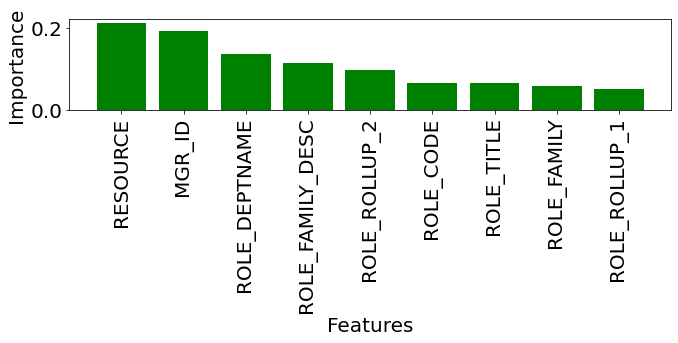

In [64]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the feature importance
plt.bar(df_fi_rfc.head(9)['Features'], df_fi_rfc.head(9)['Importance'], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig('figure/feature_importance_rfc.pdf')
plt.show()

As we can see in the model comparison, Random Forest has the highest score, which means that the variables selected have high accuracy and are important for predicting the action. The important features are resource, manager id, role department name, role family description, and company role grouping category id 2. These variables are reasonable because the goal is to predict whether applying for certain resource will get approve or not, therefore, resource id is important, and the rest of variables are important probably because a lot of these roles apply for the same resources, or these roles frequently apply for resources. Since logistic regression model has a best score value of 0.43, thus logistic regression might not be a good model for prediction the “Action”.

